# <font color = '#e64626'><center>QBUS6810 Group Assignment</center></font>
### <center>Group X: *list student IDs here*</center>

# Table of Contents

1. [Data Processing](#data_processing)
2. [Exploratory Data Analysis](#eda)
3. [Feature Engineering](#feature_engineering)
4. [Methodology](#methodology)
<br> 4.1 [Model 1: *model name*](#model_1)
<br> 4.2 [Model 2: *model name*](#model_2)
<br> 4.3 [Model 3: *model name*](#model_3)
<br> 4.4 [Model 4: *model name*](#model_4)
<br> 4.5 [Model 5: *model name*](#model_5)

In [1]:
# Ast, Matplotlib, Nltk, Numpy, Pandas, Seaborn, Statsmodels, Sklearn, Warnings.
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
rc = {"xtick.labelsize": 12, "ytick.labelsize": 12, "axes.labelsize": 15, 
      "axes.titlesize": 15, "legend.fontsize": 12}
sns.set_context("notebook", rc=rc)  

## <font color = '#e64626'><a id='data_processing'>1. Data Processing</a></font>

In [84]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

response = 'price'

y_train = train[response]
y_test = test[response]

## <font color = '#e64626'><a id='eda'>2. Exploratory Data Analysis</a></font>

The example provided here is to show you how to save figures of an appropriate resolution by using <tt>dpi</tt>. The <tt>bbox_inches='tight'</tt> is used to ensure that when your figure is saved, there are no cropping issues. In the example, the figure is saved as a <tt>.png</tt>, but you may also want to save your figures as a <tt>.pdf</tt>.

When you produce figures, make sure that all axes labels are readable. This notebook has been setup so that in general, the fontsizes are readable. These are defined in cell [2].

You can change the dimensions of the figure by changing the `figsize`.

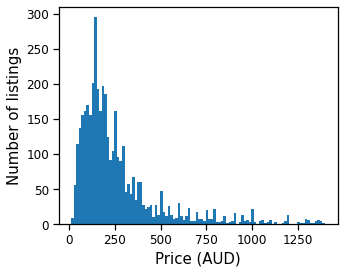

In [4]:
plt.figure(figsize=(5, 4))
plt.hist(y_train, bins=100);
plt.xlabel('Price (AUD)')
plt.ylabel('Number of listings')
plt.savefig('hist_of_response.png', dpi=300, bbox_inches='tight')

## <font color = '#e64626'><a id='feature_engineering'>3. Feature Engineering</a></font>

# Amenities

In [5]:
train['amenities_clean'] = np.nan
train['amenities_clean'] = train['amenities_clean'].astype('object')

In [6]:
for i in tqdm(range(len(train['amenities']))):
#     train.at[i,'amenities_clean'] = train.loc[i,'amenities'][1:-1].replace(' "','').replace('"','').split(',')
    train.at[i,'amenities_clean'] = train.loc[i,'amenities'][2:-2].split('", "')

100%|████████████████████████████████████| 4000/4000 [00:00<00:00, 40058.01it/s]


In [7]:
for i in tqdm(range(len(train['amenities_clean']))):
    for j in range(len(train.loc[i,'amenities_clean'])):
        if 'Fast wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Fast Wifi'
        if 'Wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Wifi'
        if 'HDTV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'HD Television'
        if 'TV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'TV'
        if 'body soap' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Body soap'
        if 'shampoo' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shampoo'
        if 'refrigerator' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'fridge' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'conditioner' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Conditioner'
        if 'stove' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Stove'
        if 'oven' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Oven'
        if 'sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Clothing storage' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Clothing storage'
        if 'Children\\u2019s books and toys' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Children\\u2019s books and toys'
        if 'Shared hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Hot tub'
        if 'Private hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private hot tub'
        if 'Shared pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Private pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Free washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Paid washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Free dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Paid dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'on premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking on premises'
        if 'off premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'Free street parking' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'conditioning' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Air conditioning'
        if 'Game console' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Game console'
        if 'Gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'coffee' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Coffee maker'
        if 'sauna' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sauna'
        if 'high chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'High chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Shared fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shared garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        
        
        

100%|███████████████████████████████████████| 4000/4000 [00:57<00:00, 69.06it/s]


In [8]:
amen_len = [len(i) for i in train['amenities_clean']]

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

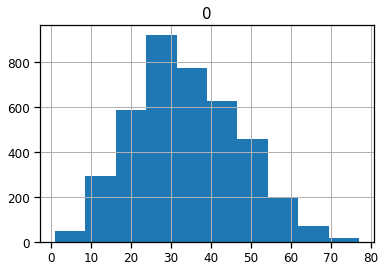

In [9]:
pd.DataFrame(amen_len).hist()

In [10]:
all_list = []
for i in train['amenities_clean']:
    all_list.extend(i)

Amen_freq = pd.DataFrame(all_list).value_counts()

In [11]:
len(Amen_freq)

135

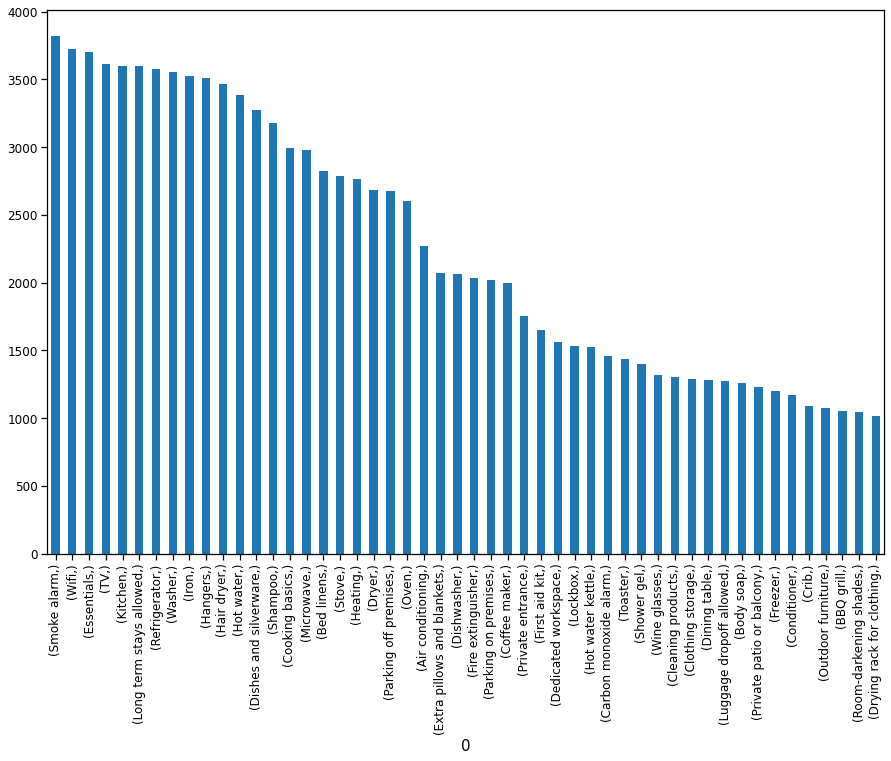

In [12]:
Amen_freq[:50].plot.bar(figsize=(15,10))
plt.show()

In [20]:
# dummies_list = pd.Series(all_list).unique()
# sub_dummies = pd.DataFrame(index = pd.Series(all_list).unique())
# amen_dummies = pd.DataFrame([])

In [29]:
amen_list = train['amenities_clean'].to_list()
vectorizer = CountVectorizer(analyzer=lambda x: x)
bow = vectorizer.fit_transform(amen_list)
bow_df = pd.DataFrame(bow.todense(), columns = vectorizer.get_feature_names_out())
bow_reverse = bow_df.replace({0:1, 1:0})


<AxesSubplot:>

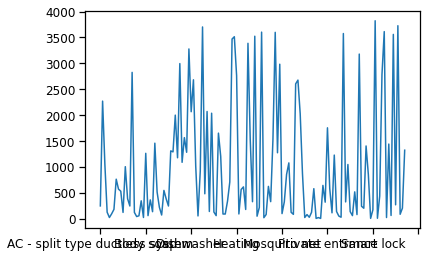

In [67]:
bow_df.sum().plot()

<AxesSubplot:>

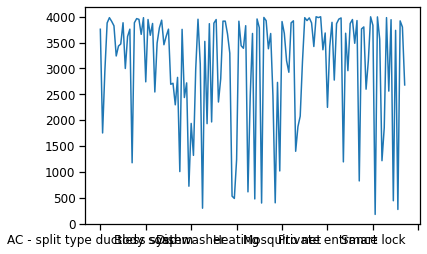

In [68]:
bow_reverse.sum().plot()

In [60]:
amen_diff_price = (bow_df.T * y_train).T.mean() - (bow_reverse.T * y_train).T.mean()

In [63]:
amen_diff_price

AC - split type ductless system   -236.9325
Air conditioning                    60.6665
BBQ grill                          -69.8560
Baby bath                         -250.4540
Baby monitor                      -265.3540
                                     ...   
Waterfront                        -216.8755
Wifi                               235.4705
Window AC unit                    -256.6610
Window guards                     -243.6745
Wine glasses                       -80.0030
Length: 135, dtype: float64

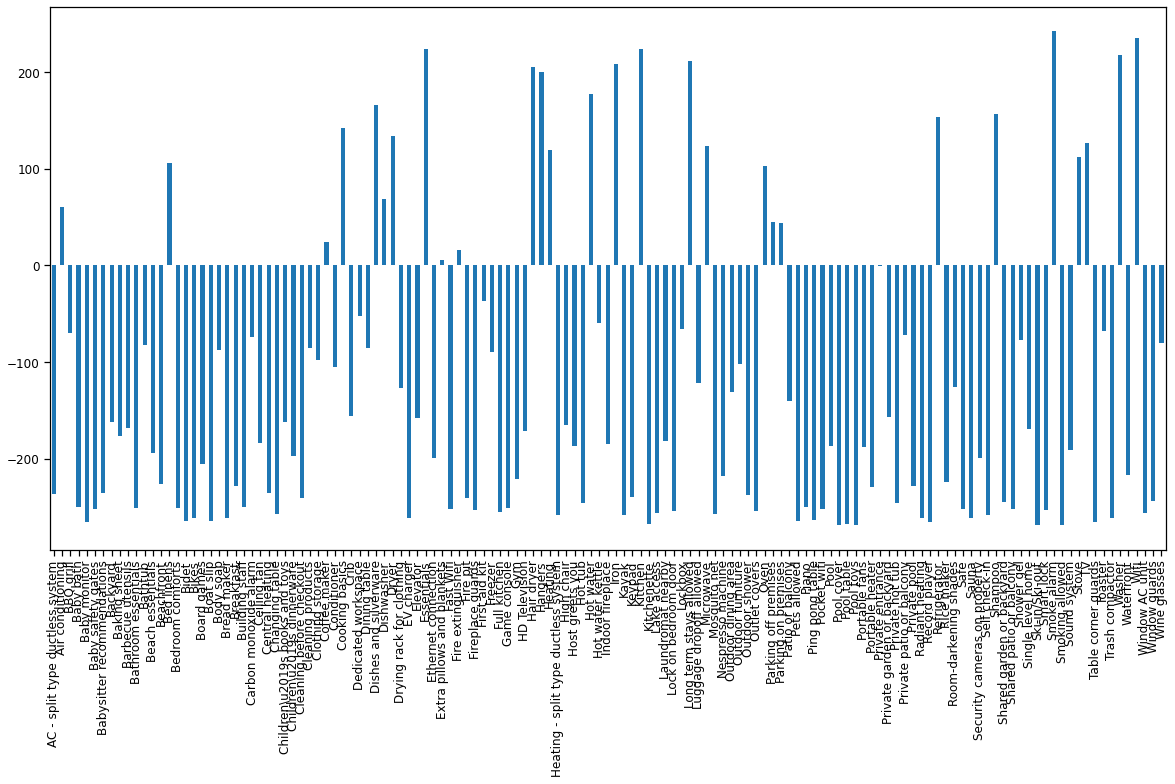

In [62]:
amen_diff_price.plot.bar(figsize=(20,10))
plt.show()

In [34]:
X = bow_df
y = y_train.to_numpy()

# Build your linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [70]:
linear_reg.score(X, y)

0.42033890472291613

<AxesSubplot:>

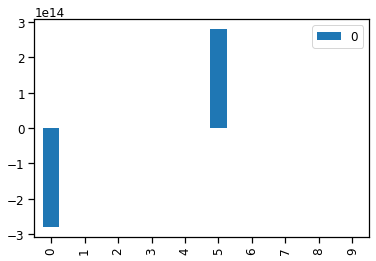

In [44]:
pd.DataFrame(linear_reg.coef_[10:20]).plot.bar()

In [47]:
linear_reg.r2_score

AttributeError: 'LinearRegression' object has no attribute 'r2_score'

# Description

In [13]:
train['description'][train['description'].isna()] = ''

/var/folders/nq/xtfndg6x53g0ffw66wk7g0100000gn/T/ipykernel_32932/2355602914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['description'][train['description'].isna()] = ''


In [104]:
train['description'][0]

'Maroubra/Little Bay Ocean Views/City and Airport<br />Walking distance to 5 beaches at Little Bay<br />This stylish ground floor unique space has uncompromising ocean views, a perfect beachside escape. This spacious 2 bedroom open plan and unique  ground floor in a double storey house is fully equipped for a weekend getaway.<br /><br /><br />Only footsteps from the water, with 8 minutes drive to Maroubra surf break, Mahon rock pool, the coastal walk to Bondi Beach, cafes, shops, top eateries  and express city buses.<br /><br /><b>The space</b><br />The space downstairs for guests has 2 bedrooms. One bedroom has a queen size bed and the second bedroom has a single bed. One Bathroom with a shower.<br />There is a kitchenette with basic kitchen facilities like microwave, refrigerator, kettle, toaster, crockery and cutlery, etc. There are no cooking facilities. <br />There are large living and dining areas with a smart TV. And spacious beautiful outdoor areas with ocean views for guests t

In [14]:
corpus_des = [i for i in train['description']]

In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_vectorizer.fit(corpus_des)

tfidf = tfidf_vectorizer.transform(corpus_des)

features = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())


In [103]:
X

,00,000,006,00am,00ish,00pm,00请不要大声使用厨房和洗衣房,02,0426239221,090,...,餐桌和凳椅,餐桌椅,餐桌等物品齐全,饭店,马路两边一边有2小时的停车限制,马路对面有多线路bus,高层有景兩房公寓,高档公寓位于悉尼市最中心,高档床垫和床上用品,鸡蛋
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X = features
y = y_train.to_numpy()

# Build your linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [99]:
features.shape

(4000, 13136)

In [72]:
linear_reg.score(X, y)

0.9948417189746537

In [75]:
# test['description'][test['description'].isna()] = ''
# test_corpus_des = [i for i in test['description']]
# test_tfidf = tfidf_vectorizer.transform(test_corpus_des)

# test_features = pd.DataFrame(test_tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())


/var/folders/nq/xtfndg6x53g0ffw66wk7g0100000gn/T/ipykernel_32932/1839427432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['description'][test['description'].isna()] = ''


In [98]:
features.sum().sort_values(ascending=False)[0:50]

br             992.501803
apartment      173.241533
beach          126.947085
bedroom        126.590383
space          125.584826
access         122.900876
sydney         121.453848
room           120.147001
bed            112.657039
house          109.978513
walk           106.913652
kitchen        104.463965
home           102.452798
private         91.375414
living          90.634773
area            89.982767
guest           86.829448
bathroom        85.080051
large           84.962587
located         84.158192
city            80.542994
views           77.660928
number          75.391094
modern          75.389213
bondi           74.800787
license         74.277922
fully           74.192077
stay            73.734747
balcony         73.684164
enjoy           71.983324
street          70.927294
dining          69.637459
parking         69.179848
queen           68.878073
studio          68.211453
minutes         67.761239
perfect         67.566860
spacious        67.117012
restaurants 

In [ ]:
new_corpus = [corpus[1]]

# Transform new_corpus with your TfidfVectorizer
new_tfidf = tfidf_vectorizer.transform(new_corpus)
new_tfidf_df = pd.DataFrame(new_tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())

# Make prediction
new_X = new_tfidf_df
prediction = linear_reg.predict(new_X)

print('{:.1f}'.format(prediction[0]))

<AxesSubplot:>

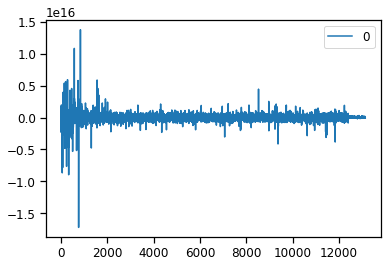

In [105]:
pd.DataFrame(linear_reg.coef_).plot()

In [ ]:
(linear_reg.coef_)[1500:1550]

In [ ]:
features.columns[1500:1550]

## <font color = '#e64626'><a id='methodology'>4. Methodology</a></font>

### <font color = '#e64626'><a id='model_1'>4.1. Model 1: Baseline</a></font>

This is a very simple model where we predict the average house price every time, i.e.

$$\hat{y}=\bar{y}$$

The models you build should be much more interesting than this one!

In [ ]:
mean_price = np.mean(y_train)
print('Mean price: ${:.2f}'.format(mean_price))

Now we need to generate the submission file.

In [ ]:
id_col = np.arange(2000).reshape(-1, 1)
y_pred = mean_price*np.ones(2000).reshape(-1, 1)

data = np.hstack((id_col, y_pred))

m1_submission = pd.DataFrame(data, columns=['id', 'price'])
m1_submission['id'] = m1_submission['id'].astype('int')

m1_submission.to_csv('model1_submission.csv', index=False)

### <font color = '#e64626'><a id='model_2'>4.2. Model 2: *model name*</a></font>

### <font color = '#e64626'><a id='model_3'>4.2. Model 3: *model name*</a></font>

### <font color = '#e64626'><a id='model_4'>4.2. Model 4: *model name*</a></font>

### <font color = '#e64626'><a id='mode_5'>4.2. Model 5: *model name*</a></font>